# How far are our friends over the years?

A simple python operation to visualize our geolocation distances in the past ten years (computed in python by the distance of cities we live in).

In [16]:
from geopy.geocoders import Nominatim
from geopy.distance import vincenty
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


def dists_log(dists):
    return np.log(np.array(dists))

def distance(city1,city2):
    geolocator = Nominatim()
    location1 = geolocator.geocode(city1)
    location2 = geolocator.geocode(city2)
    city1_cor=(location1.latitude, location1.longitude)
    city2_cor=(location2.latitude, location2.longitude)
    return vincenty(city1_cor,city2_cor).miles


def jitter_dist(dists):
    for i in range(len(dists)):
        if dists[i]==0.0:
            dists[i]=0.5

In [97]:
bj='beijing'
m='mclean,VA'
v='vienna,VA'
bt='boston,MA'
ar='arlington,VA'
pgh='pittsburgh,PA'
hd_bj="haidian,beijing"
cy_bj="chaoyang,beijing"
mc='mexico city'
res='reston,va'

time=[x for x in range(2005,2017)]
mes_loc=[mc,mc,mc,mc,mc,mc,res,res,m,m,v,bt]
cl_loc=[hd_bj,pgh,pgh,pgh,pgh,pgh,pgh,m,m,m,v,bt]
sq_loc=[cy_bj,pgh,pgh,pgh,pgh,pgh,bj,ar,ar,m,m,m]
print len(sq_loc)==len(time)

dists_cq=[]
dists_mq=[]
dists_cm=[]
for i in range(len(cl_loc)):
    dist_cq=distance(cl_loc[i],sq_loc[i])
    dist_cm=distance(cl_loc[i],mes_loc[i])
    dist_mq=distance(mes_loc[i],sq_loc[i])
    dists_cq.append(dist_cq)
    dists_mq.append(dist_mq)
    dists_cm.append(dist_cm)

jitter_dist(dists_cq)
jitter_dist(dists_mq)
jitter_dist(dists_cm)

True


In [102]:
cl_lab=['hd_bj','pgh','pgh','pgh','pgh','pgh','pgh','m','m','m','v','bt']
sq_lab=['cy_bj','pgh','pgh','pgh','pgh','pgh','bj','ar','ar','m','m','m']
mes_loc=['mc','mc','mc','mc','mc','mc','res','res','m','m','v','bt']
labels=zip(cl_lab,sq_lab)

# Visulization of distances

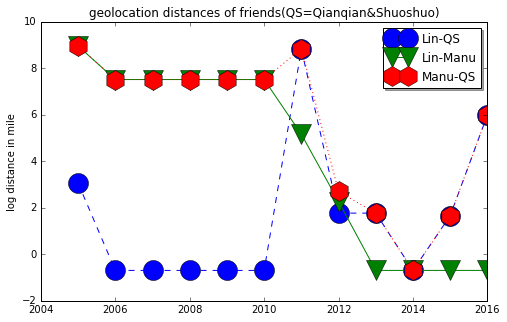

In [120]:
fig,ax=plt.subplots(figsize=(8,5))
ax.set_title('geolocation distances of friends(QS=Qianqian&Shuoshuo)')

ax.plot(time,dists_log(dists_cq),'o--',markersize=20,label='Lin-QS')
ax.plot(time,dists_log(dists_cm),'v-',markersize=20,label='Lin-Manu')
ax.plot(time,dists_log(dists_mq),'h:',markersize=20,label='Manu-QS')

legend = ax.legend(loc='upper right', shadow=True)



ax.set_ylabel('log distance in mile')

#for i, txt in enumerate(labels):
 #   ax.annotate(txt, (time[i],dists_log[i]))


# Conclusion

Our distances tends to oscillate periodically (blue+red+green, with the current value 2016 being between Boston and McLean,VA).

Our distances are minimized in 2014 when we all lived in Lillian Court. 

In the future, it is likely it will become small again!